In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import VBox
from IPython.display import display, clear_output
# 日本語フォント対応
plt.rcParams['font.family'] = 'AppleGothic'

base_dir = "/Users/takumi-mac/PyProject/system_trade/daily_stock/app/data/"

stock_data_path_list = [base_dir + "30percentup/" + d for d in os.listdir(base_dir + "30percentup/") if d.endswith(".csv")]
# リストの中身を昇順にソート
stock_data_path_list.sort()
i = 0

def show_chart(index: int):
    output.clear_output()

    with output:
        data = pd.read_csv(stock_data_path_list[index])
        data["Date"] = pd.to_datetime(data["Date"])
        # チャートの描画
        fig, ax1 = plt.subplots(figsize=(14, 7))  # グラフのサイズを指定
        # 終値を描画
        ax1.plot(data['Date'], data['Close'], color='b')  # 終値を描画
        # 銘柄情報を取得
        stock_info = pd.read_csv(base_dir + "tosho_stocks/data_j.csv")
        ticker = data["Ticker"][0]
        company_name = stock_info[stock_info["コード"] == int(ticker)]["銘柄名"].values[0]
        ax1.set_title("%s %s" %(company_name, ticker))  # タイトル
        ax1.set_xlabel('Date')  # x軸のラベル
        ax1.set_ylabel('Close Price', color='b')  # y軸のラベル
        ax1.grid(True)  # グリッドの表示
        # 出来高を描画
        ax2 = ax1.twinx()  # 2つ目のY軸を作成
        ax2.bar(data['Date'], data['Volume'], color='gray', alpha=0.3)  # 出来高を描画
        ax2.set_ylabel('Volume', color='gray')  # y軸のラベル
        plt.show()  # チャートの表示

def on_netxtbuton_clicked(b):
    global i
    i += 1
    if i >= len(stock_data_path_list):
        i = 0
    show_chart(i)

def on_prevbuton_clicked(b):
    global i
    i -= 1
    if i < 0:
        i = len(stock_data_path_list) - 1
    show_chart(i)

output = widgets.Output()

next_button = widgets.Button(description="Next")
prev_button = widgets.Button(description="Prev")

next_button.on_click(on_netxtbuton_clicked)
prev_button.on_click(on_prevbuton_clicked)

ui = VBox([next_button, prev_button, output])
display(ui)

show_chart(i)

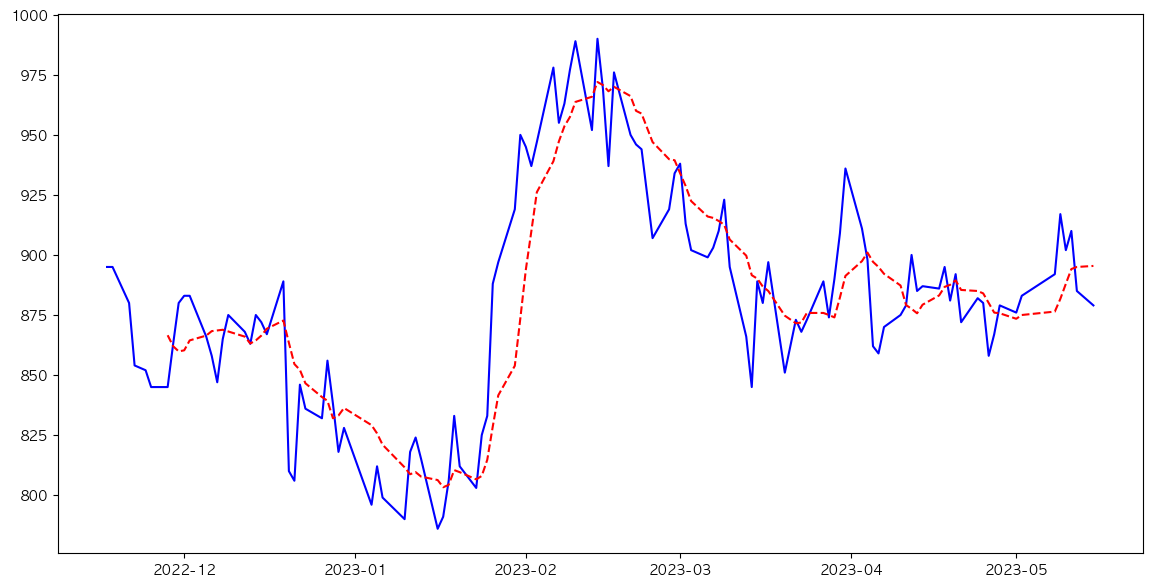

In [2]:
stock_data_path_list = [base_dir + "cup_pattern/" + d for d in os.listdir(base_dir + "cup_pattern/") if d.endswith(".csv")]
# リストの中身を昇順にソート
stock_data_path_list.sort()

i = 0

def show_chart(index: int):
    output.clear_output()

    with output:
        data = pd.read_csv(stock_data_path_list[index])
        data["Date"] = pd.to_datetime(data["Date"])
        # チャートの描画
        fig, ax1 = plt.subplots(figsize=(14, 7))  # グラフのサイズを指定
        # 終値を描画
        ax1.plot(data['Date'], data['Close'], color='b')
        # ７日移動平均線を描画
        ax1.plot(data['Date'], data['MA'], color='r', linestyle='dashed')
        # 銘柄情報を取得
        stock_info = pd.read_csv(base_dir + "tosho_stocks/data_j.csv")
        ticker = stock_data_path_list[index].split("/")[-1].split(".")[0]
        company_name = stock_info[stock_info["コード"] == int(ticker)]["銘柄名"].values[0]
        ax1.set_title("%s %s" %(company_name, ticker))  # タイトル
        ax1.set_xlabel('Date')  # x軸のラベル
        ax1.set_ylabel('Close Price', color='b')  # y軸のラベル
        ax1.grid(True)  # グリッドの表示
        # 出来高を描画
        ax2 = ax1.twinx()  # 2つ目のY軸を作成
        ax2.bar(data['Date'], data['Volume'], color='gray', alpha=0.3)  # 出来高を描画
        ax2.set_ylabel('Volume', color='gray')  # y軸のラベル
        plt.show()  # チャートの表示

def on_netxtbuton_clicked(b):
    global i
    i += 1
    if i >= len(stock_data_path_list):
        i = 0
    show_chart(i)

def on_prevbuton_clicked(b):
    global i
    i -= 1
    if i < 0:
        i = len(stock_data_path_list) - 1
    show_chart(i)

output = widgets.Output()

next_button = widgets.Button(description="Next")
prev_button = widgets.Button(description="Prev")

next_button.on_click(on_netxtbuton_clicked)
prev_button.on_click(on_prevbuton_clicked)

ui = VBox([next_button, prev_button, output])
display(ui)

show_chart(i)